In [1]:
# runup with variable slope
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = 'D:/crs/proj/2022_runup/'
fnames = ['hom_profiles.csv']

# from colorbrewer
oranges = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']

# load a profile
fname = fnames[0]
df=pd.read_csv(data_dir+fname,header = 0,delimiter=',')
df

,ID,X,Y,Elevation,Elevation (2020015FA_Truro_topobathy_1m.tif),Elevation (2021014FA_Truro_topobathy_1m.tif),Elevation (2022015FA_Truro_Topobathy_1m.tif),Distance (Segment),Distance (Total),Distance 3D (Segment),Distance 3D (Total),Slope (Degrees),Slope (Percent),Segment Index
0,1,410754.987,4656015.953,16.989,16.850,16.674,16.989,0.000,0.000,0.000,0.000,0.0,0.0,1
1,2,410755.424,4656016.639,16.946,16.895,16.687,16.946,0.813,0.813,0.814,0.814,3.0,5.2,1
2,3,410755.860,4656017.324,16.854,16.922,16.679,16.854,0.813,1.626,0.818,1.632,6.5,11.4,1
3,4,410756.297,4656018.009,16.783,16.929,16.644,16.783,0.813,2.438,0.816,2.448,5.0,8.7,1
4,5,410756.733,4656018.695,16.764,16.903,16.563,16.764,0.813,3.251,0.813,3.261,1.4,2.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1020,411199.746,4656714.365,-9.275,NaN,-9.453,-9.275,0.813,828.250,0.813,831.670,1.5,2.5,1
1020,1021,411200.182,4656715.051,-9.295,NaN,-9.470,-9.295,0.813,829.070,0.813,832.480,1.4,2.5,1
1021,1022,411200.619,4656715.736,-9.316,NaN,-9.487,-9.316,0.813,829.880,0.813,833.300,1.4,2.5,1
1022,1023,411201.055,4656716.422,-9.336,NaN,-9.505,-9.336,0.813,830.690,0.813,834.110,1.4,2.5,1


In [2]:
# extract data columns with convenient names
dist = df['Distance (Total)'].values
e2020 = df['Elevation (2020015FA_Truro_topobathy_1m.tif)'].values
e2021 = df['Elevation (2021014FA_Truro_topobathy_1m.tif)'].values
e2022 = df['Elevation (2022015FA_Truro_Topobathy_1m.tif)'].values

In [3]:
def calc_L0(Tp = 10.):
    L0 = (9.81*Tp**2)/(2.*np.pi)
    return L0

def S06(H0 = 2., L0 = 156.131, Beta = 0.02):
    Ir = Beta/np.sqrt(H0/L0)
    S06_Setup = 0.35*Beta*np.sqrt(H0*L0)
    S06_Sinc = 0.75*Beta*np.sqrt(H0*L0)
    S06_Sig = 0.06*np.sqrt(H0*L0)
    S = np.sqrt(S06_Sinc**2+S06_Sig**2)
    R2 = 1.1*(S06_Setup+0.5*S)
    return R2

In [4]:
# specify Hs, Tp, water level

# estimate slope between water level and 0.2*Hs

# calculate runup

# estimate slope between w.l. and runup

# final estimate of runup

In [5]:
# rfac - initial guess of runup wrt Hs
sfac = 0.17 

# pick a profile
elev = e2021

# pick water level
wl = 0.5
Hs = 2.
Tp = 10.
L0 = calc_L0( Tp )

iwl = np.argwhere( elev <= wl)[0]
ewl = elev[iwl]
dwl = dist[iwl]

maxit = 7
slope = np.nan*np.ones(maxit+1)
R2 = np.ones_like( slope )
eR2 = np.ones_like( slope )
dR2 = np.ones_like( slope )

slope[0] = 0.05
print( 'Slope    Runup   Elev')
for i in np.arange(maxit):
    R2[i] = S06( Hs, L0, slope[i] )
    eR2[i] = R2[i]+wl
    iR2 = np.argwhere( elev <= eR2[i])[0]
    dR2[i] = dist[iR2]
    iwl = np.argwhere( elev <= wl)[0]
    slope[i+1] = (eR2[i] - ewl)/(dwl - dR2[i]) 
    print('{:.3f}    {:.2f}    {:.2f}'.format(slope[i], R2[i], eR2[i]))

Slope    Runup   Elev
0.050    1.03    1.53
0.034    0.87    1.37
0.032    0.85    1.35
0.032    0.84    1.34
0.032    0.85    1.35
0.032    0.84    1.34
0.032    0.85    1.35


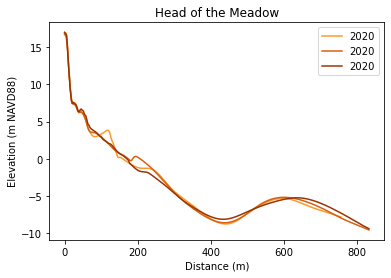

In [6]:
# plot
plt.plot(dist, e2020, label='2020', c = oranges[3])
plt.plot(dist, e2021, label='2020', c = oranges[4])
plt.plot(dist, e2022, label='2020', c = oranges[5])
plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Distance (m)')
plt.title('Head of the Meadow')
_ = plt.legend()
#plt.savefig(data_dir+'hom_runup_profile.jpg', dpi=200, bbox_inches='tight')

In [7]:
# specify Hs, Tp, water level

# estimate slope between water level and 0.2*Hs

# calculate runup

# estimate slope between w.l. and runup

# final estimate of runup